In [1]:
import joblib
import numpy as np
import pandas as pd
from pathlib import Path
import os
import random
from sklearn.ensemble import RandomForestClassifier
import time

from dvclive import Live

## Prepare data

In [2]:
DATA_PATH = 'data/features.csv'

# Create data dir
directory_path = Path('data')
directory_path.mkdir(parents=True, exist_ok=True)

In [3]:
# Number of rows
n_rows = 100
n_cols = 5

# Generate random float data for features
feature_data = np.random.rand(n_rows, n_cols)

# Generate random binary data for the target
target_data = np.random.randint(2, size=n_rows)

# Create a DataFrame for features
df_features = pd.DataFrame(feature_data, columns=[f'feature_{i}' for i in range(1, n_cols + 1)])

# Add the target column to the DataFrame
df_features['target'] = target_data

# Save the DataFrame to a CSV file
df_features.to_csv(DATA_PATH, index=False)

In [4]:
df_features.head(3)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.039534,0.787519,0.160097,0.991075,0.998028,0
1,0.215726,0.134286,0.020046,0.652218,0.513369,0
2,0.764993,0.937675,0.529959,0.661965,0.920720,1


## Train model

In [5]:
MODEL_PATH = "manifests/manifests.pkl"

directory_path = Path('manifests')
directory_path.mkdir(parents=True, exist_ok=True)

In [6]:
print("Training Random Forest model - START")

# Load the prepared data
data = pd.read_csv(DATA_PATH)

# Extract features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Train the model
model = RandomForestClassifier() # Example model
model.fit(X, y)

# Simulate GridSearch hyperparameter tuning
errors = []
max_leaf_nodes = [5, 50, 500, 5000]
for nodes in max_leaf_nodes:
    error = random.random()
    errors.append(error)
    print(f"Max leaf nodes: {nodes}  \t ➡ Mean Absolute Error:  {error}")

# Create a DataFrame from the lists
datapoints = pd.DataFrame({
    'Max Leaf Nodes': max_leaf_nodes,
    'Error': errors
})

# Save the trained model
joblib.dump(model, MODEL_PATH)

Training Random Forest model - START
Max leaf nodes: 5  	 ➡ Mean Absolute Error:  0.17513884091883813
Max leaf nodes: 50  	 ➡ Mean Absolute Error:  0.2613135749210973
Max leaf nodes: 500  	 ➡ Mean Absolute Error:  0.6606279329546779
Max leaf nodes: 5000  	 ➡ Mean Absolute Error:  0.6799522233071887


['manifests/manifests.pkl']

## Log metrics and Artifacts

In [7]:
LIVE_DIR = 'dvclive' # default

# DVC Report

metrics.json

|     mae |   segment_A.f1 |   step |
|---------|----------------|--------|
| 6.45884 |       0.410509 |     19 |

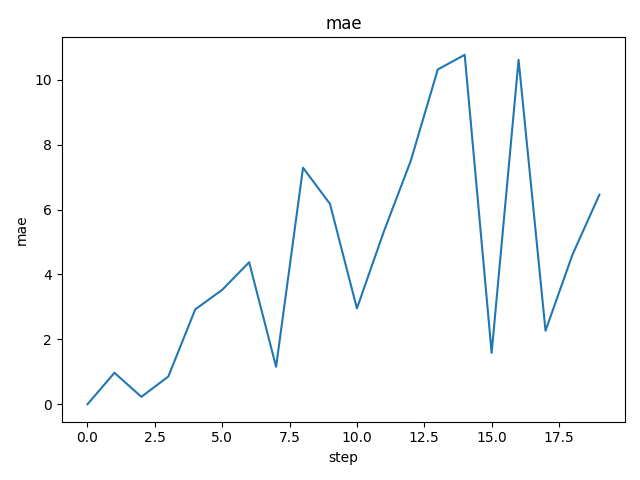

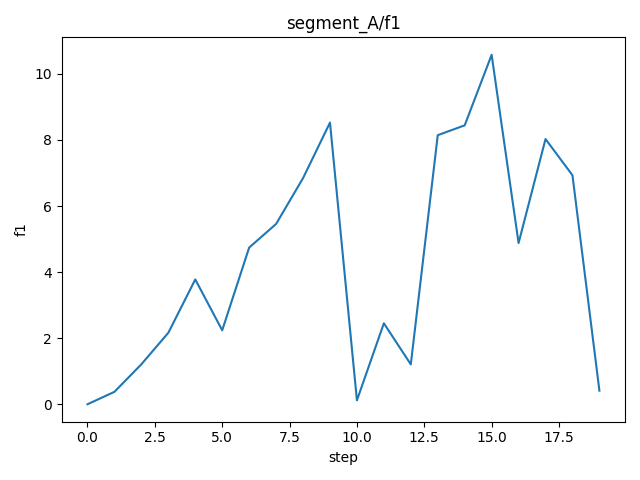



/Users/mikhailrozhkov/dev/cse/customers/tempus/example-rnd-monorepo/.venv/lib/python3.11/site-packages/dvc_render/vega.py:169: UserWarning: `generate_markdown` can only be used with `LinearTemplate`
  warn("`generate_markdown` can only be used with `LinearTemplate`")  # noqa: B028


Pipeline - bio-1023 - COMPLETE


In [8]:

EPOCHS = 20

with Live(dir=LIVE_DIR, 
          report='notebook') as live:

    # Log metrics in multiple epocs 
    for i in range(EPOCHS):
        live.log_metric("mae", i * random.random())
        live.log_metric("segment_A/f1", i * random.random())
        live.next_step()
        time.sleep(1)

    # Log a plot with datapoints 
    live.log_plot(
        "errors_vs_leafs",
        datapoints,
        x="Max Leaf Nodes",
        y="Error",
        template="simple",
        title="Errors vs Max Leaf Nodes")

    # Log Model / Manifest 
    live.log_artifact(
        path=MODEL_PATH,
        type="model",
        name="manifest",
        labels=["bio-1023", "example-rnd-monorepo"],
    )
    
    # Log a Dataset Artifact / Manifest 
    live.log_artifact(
        path=DATA_PATH,
        type="dataset",
        name="data-bio-1023",
        labels=["bio-1023", "example-rnd-monorepo"],
        meta=[{'columns': data.columns.to_list()}]
    )
    
print("Pipeline - bio-1023 - COMPLETE")
